In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_ml = pd.read_csv("../data/data_ml.csv")

In [ ]:
pd.set_option('display.max_rows', 101)
df_ml.head().T

,0,1,2,3,4
stock_id,13,13,13,17,17
date,2006-12-31,2007-01-31,2007-02-28,2015-03-31,2015-04-30
Advt_12M_Usd,0.25,0.25,0.26,0.73,0.72
Advt_3M_Usd,0.33,0.32,0.3,0.64,0.62
Advt_6M_Usd,0.27,0.28,0.3,0.7,0.66
Asset_Turnover,0.22,0.22,0.22,0.4,0.4
Bb_Yld,0.33,0.4,0.15,0.47,0.46
Bv,0.01,0.01,0.01,0.01,0.01
Capex_Ps_Cf,0.13,0.13,0.13,0.7,0.7
Capex_Sales,0.84,0.84,0.84,0.74,0.74


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df_ml[['Mom_Sharp_11M_Usd']]
X

,Mom_Sharp_11M_Usd
0,0.20
1,0.17
2,0.30
3,0.03
4,0.02
...,...
269385,0.17
269386,0.11
269387,0.23
269388,0.20


In [ ]:
separation_date = '2014-01-15'
df_train = df_ml.query('date < @separation_date')
df_test = df_ml.query('date >= @separation_date')

In [ ]:
X_train = df_train[['Mom_Sharp_11M_Usd']]
y_train = df_train[['R1M_Usd']]

In [ ]:
X_test = df_test[['Mom_Sharp_11M_Usd']]
y_test = df_test[['R1M_Usd']]

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error

In [ ]:
root_mean_squared_error(y_train, model.predict(X_train))

0.17043182233234044

In [ ]:
model.predict(X_train).mean()

0.013675126266429702

In [ ]:
mean_squared_error(y_train, model.predict(X_train))

0.029047006063522455

In [ ]:
mean_absolute_error(y_train, model.predict(X_train))

0.08370796275150147

In [ ]:
model.score(X_train, y_train)

0.0004870820383096053

In [ ]:
import seaborn as sns

In [ ]:
df = pd.DataFrame({
    'true':y_train.values.ravel(),
    'predicted': model.predict(X_train).ravel()
})
df

,true,predicted
0,0.089,0.017614
1,0.039,0.018006
2,-0.012,0.016306
3,0.169,0.019313
4,1.239,0.018398
...,...,...
199177,-0.029,0.018006
199178,0.028,0.018791
199179,0.011,0.017222
199180,0.045,0.017614


<Axes: xlabel='true', ylabel='predicted'>

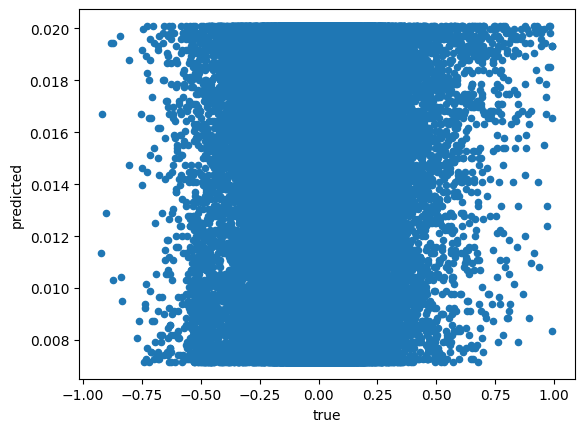

In [ ]:
df.query("true < 1").plot(x="true", y="predicted", kind="scatter")

<Axes: >

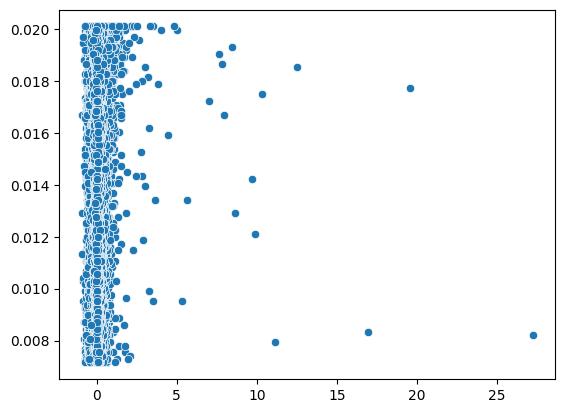

In [ ]:
sns.scatterplot(x=y_train.values.ravel(), y=model.predict(X_train).ravel())

In [ ]:
y_train.sort_values(by='R1M_Usd')

,R1M_Usd
207811,-0.922
69558,-0.921
215884,-0.902
33409,-0.880
141060,-0.875
...,...
202962,11.105
3456,12.500
432,16.913
141471,19.556


In [ ]:
y_train.values

array([[ 0.089],
       [ 0.039],
       [-0.012],
       ...,
       [ 0.011],
       [ 0.045],
       [-0.356]])

<Axes: >

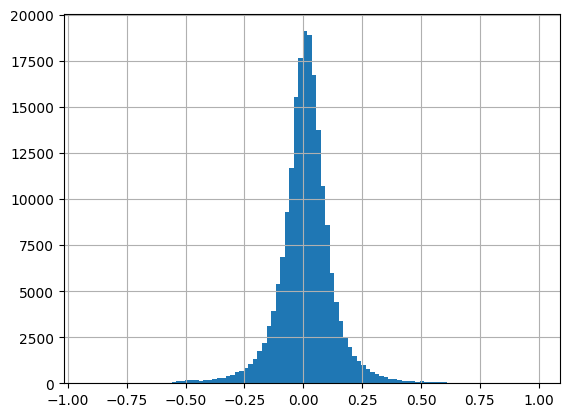

In [ ]:
#y_train.query("R1M_Usd < 1").hist(bins=1000)
df.query("true < 1")['true'].hist(bins=100)

<Axes: >

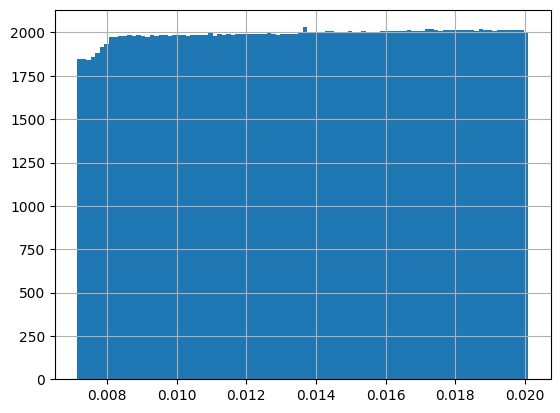

In [ ]:
df.query("true < 1")['predicted'].hist(bins=100)

In [ ]:
df_train

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd,R1M_Usd_C,R12M_Usd_C
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,1.00,0.92,0.84,0.88,0.089,0.104,0.344,-0.041,1.0,1.0
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,1.00,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253,1.0,0.0
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,1.00,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366,0.0,0.0
30,29,2002-09-30,0.43,0.18,0.28,0.29,0.78,0.01,0.30,0.86,...,1.00,1.00,0.99,0.97,0.169,1.084,0.699,4.169,1.0,1.0
31,29,2002-10-31,0.41,0.18,0.23,0.29,0.58,0.01,0.30,0.86,...,1.00,1.00,0.99,0.97,1.239,0.371,1.630,7.144,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269385,1205,2004-05-31,0.97,0.97,0.98,0.19,0.74,1.00,0.54,0.90,...,0.57,0.59,0.34,0.63,-0.029,-0.027,0.038,0.112,0.0,1.0
269386,1205,2004-07-31,0.97,0.96,0.98,0.19,0.75,1.00,0.53,0.90,...,0.58,0.60,0.29,0.64,0.028,0.077,0.175,0.122,1.0,0.0
269387,1205,2004-08-31,0.97,0.96,0.97,0.19,0.75,1.00,0.53,0.90,...,0.58,0.60,0.27,0.64,0.011,0.076,0.152,0.091,0.0,0.0
269388,1205,2004-09-30,0.97,0.96,0.97,0.18,0.93,1.00,0.52,0.90,...,0.57,0.60,0.26,0.66,0.045,0.178,0.196,0.040,1.0,0.0


In [ ]:
df_train['R1M_Usd_C'].mean()

0.4971332750951391

In [ ]:
columns_to_drop = [
    'stock_id', 'date', # non-feature identifiers
    'R1M_Usd', 'R3M_Usd', 'R6M_Usd', 'R12M_Usd', # numerical labels
    'R1M_Usd_C', 'R12M_Usd_C' # categorical labels
]

features = list(df_ml.drop(columns=columns_to_drop).columns)

In [ ]:
X_train = df_train[features]
y_train = df_train[['R1M_Usd_C']]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/home/pritam/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
model.score(X_train, y_train)

0.524736170939141

In [ ]:
predictors = [
    'Eps',
    'Interest_Expense',
    'Mkt_Cap_3M_Usd',
    'Mom_11M_Usd',
    'Mom_5M_Usd',
    'Net_Margin',
    'Pb',
    'Pe',
    'Recurring_Earning_Total_Assets',
    'Total_Liabilities_Total_Assets',
    'Vol1Y_Usd',
    'Vol3Y_Usd'
]

In [ ]:
X_train = df_train[predictors]
y_train = df_train[['R1M_Usd_C']]

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())
model.score(X_train, y_train)

0.5152975670492314

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(n_estimators=25, max_depth=3, learning_rate=0.1, random_state=0)

In [ ]:
xgb_model.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
xgb_model.score(X_train, y_train)

0.5259410990952997

In [ ]:
xgb_model.predict_proba(X_train)

array([[0.5050739 , 0.49492612],
       [0.5050739 , 0.49492612],
       [0.5050739 , 0.49492612],
       ...,
       [0.5248837 , 0.4751163 ],
       [0.5284707 , 0.4715293 ],
       [0.48204702, 0.517953  ]], dtype=float32)